In [20]:
%matplotlib inline

In [21]:
#Euclidean clustering
import numpy as np
import pandas as pd
import scipy.io
import community
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

XYZ_Coord = scipy.io.loadmat('data\XYZcoord1.mat')
XYZ_C = XYZ_Coord['XYZ1']
print(len(XYZ_C))

distance=np.zeros(1999000,dtype=np.float64)
dx2=np.zeros(1999000,dtype=np.float64)
dy2=np.zeros(1999000,dtype=np.float64)
dz2=np.zeros(1999000,dtype=np.float64)
a=np.zeros((1999000,3),dtype=np.float64)

count=0
for i in range(len(XYZ_C)):
    for j in range(len(XYZ_C)):
        if i==j or i>j:
            continue
        dx2[count]=(XYZ_C[i,0]-XYZ_C[j,0])**2
        dy2[count]=(XYZ_C[i,1]-XYZ_C[j,1])**2
        dz2[count]=(XYZ_C[i,2]-XYZ_C[j,2])**2
        distance[count]=dx2[count]+dy2[count]+dz2[count]
        a[count]=[i+1,j+1,distance[count]]
        count+=1 

print(a)

2000
[[1.00000000e+00 2.00000000e+00 6.65896402e+02]
 [1.00000000e+00 3.00000000e+00 4.08436617e+02]
 [1.00000000e+00 4.00000000e+00 1.23927653e+02]
 ...
 [1.99800000e+03 1.99900000e+03 4.32160535e+02]
 [1.99800000e+03 2.00000000e+03 4.41265146e+02]
 [1.99900000e+03 2.00000000e+03 5.66488956e+00]]


In [22]:
#Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph()
for i in range(0,len(a)):    
    e = ( str(int(a[i,0])), str(int(a[i,1])), a[i,2])
    G.add_weighted_edges_from([(e)])

In [23]:
partition = community.best_partition(G) #partition是字典
size = float(len(set(partition.values())))
print(partition)
print("community:", size)
mod = community.modularity(partition,G)
print("modularity:", mod)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 2, '6': 4, '7': 5, '8': 6, '9': 7, '10': 8, '11': 9, '12': 10, '13': 11, '14': 12, '15': 5, '16': 13, '17': 14, '18': 15, '19': 16, '20': 17, '21': 18, '22': 19, '23': 8, '24': 20, '25': 21, '26': 3, '27': 22, '28': 15, '29': 23, '30': 9, '31': 19, '32': 23, '33': 24, '34': 25, '35': 26, '36': 27, '37': 4, '38': 28, '39': 29, '40': 27, '41': 30, '42': 8, '43': 31, '44': 32, '45': 33, '46': 28, '47': 34, '48': 35, '49': 36, '50': 37, '51': 38, '52': 39, '53': 40, '54': 41, '55': 42, '56': 43, '57': 44, '58': 3, '59': 45, '60': 46, '61': 47, '62': 28, '63': 44, '64': 42, '65': 9, '66': 48, '67': 20, '68': 49, '69': 50, '70': 18, '71': 51, '72': 31, '73': 0, '74': 52, '75': 20, '76': 53, '77': 54, '78': 55, '79': 56, '80': 57, '81': 58, '82': 59, '83': 58, '84': 60, '85': 0, '86': 25, '87': 61, '88': 62, '89': 28, '90': 63, '91': 56, '92': 64, '93': 50, '94': 26, '95': 65, '96': 56, '97': 5, '98': 66, '99': 27, '100': 0, '101': 67, '102': 68, '103': 3

modularity: -7.149829580421409e-08


Community 0
['1', '73', '85', '100', '151', '189', '299', '343', '530', '584', '752', '1080', '1462', '1464', '1649', '1653', '1806', '1807', '1959', '1984']
Community 1
['2', '148', '246', '278', '291', '894', '915', '916', '1025', '1344', '1533', '1871', '1909', '1946']
Community 2
['3', '5', '320', '330', '516', '657', '723', '959', '1002', '1034', '1084', '1291', '1334', '1363', '1517', '1583', '1686', '1862', '1927']
Community 3
['4', '26', '58', '232', '854', '885', '1188', '1208', '1511', '1611', '1845', '1935']
Community 4
['6', '37', '244', '293', '298', '434', '484', '611', '629', '704', '837', '869', '922', '1076', '1224', '1451', '1570', '1632', '1670', '1804', '1910', '1941', '1960']
Community 5
['7', '15', '97', '127', '297', '324', '368', '433', '507', '537', '540', '575', '917', '1105', '1246', '1386', '1435', '1496', '1568', '1623', '1636', '1743', '1833', '1923', '1961']
Community 6
['8', '190', '195', '351', '510', '839', '847', '895', '968', '1006', '1161', '1211', 

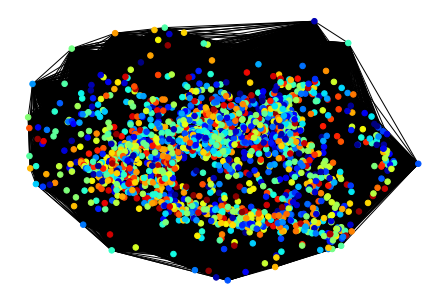

In [24]:
#assign node color based on community in network
for com in set(partition.values()) : #partition.value(第幾群)
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com] #partition.key(節點)
    print(members)
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()

In [25]:
#assign data point color based on geodesic community in realspace
label = np.zeros((len(XYZ_C),1))
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(XYZ_C))   

'print out the euclidean distance classification picture'

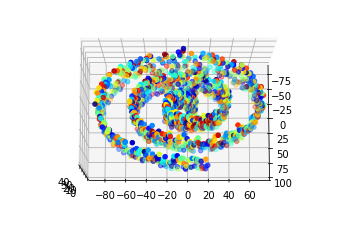

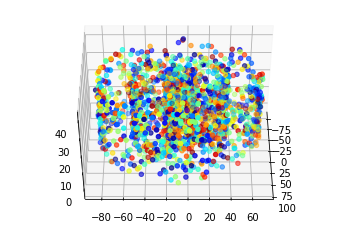

In [26]:
display("print out the euclidean distance classification picture")
fig5 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig6 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)